In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:\\ML practice datasets")

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df.drop("Outcome", axis = 1)
y = df["Outcome"]


x_scaled = StandardScaler().fit_transform(x)
print(x_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.26179749 0.21640127]


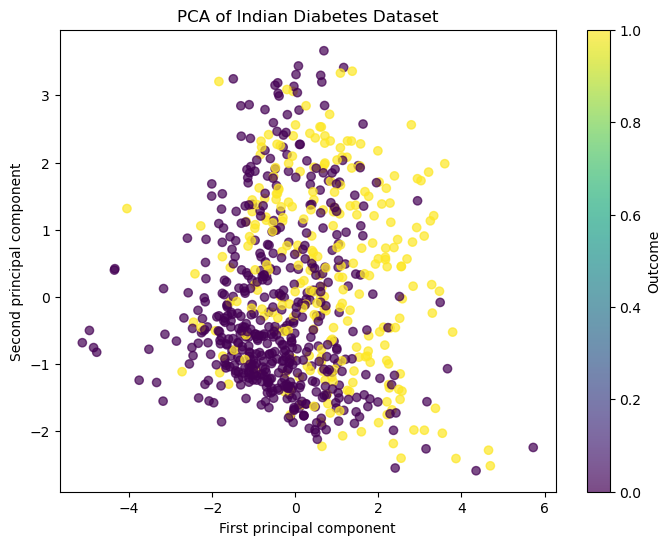

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Indian Diabetes Dataset')
plt.colorbar(label='Outcome')
plt.show()


In [17]:
loadings = pca.components_


loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=x.columns)
print(loadings_df)

                               PC1       PC2
Pregnancies               0.128432  0.593786
Glucose                   0.393083  0.174029
BloodPressure             0.360003  0.183892
SkinThickness             0.439824 -0.331965
Insulin                   0.435026 -0.250781
BMI                       0.451941 -0.100960
DiabetesPedigreeFunction  0.270611 -0.122069
Age                       0.198027  0.620589
